### Reading the dataset

In [1]:
import numpy as np
import pandas as pd

datatrain1=pd.read_csv('Batch1e.csv')
datatrain2=pd.read_csv('Batch2e.csv')
datatrain3=pd.read_csv('Batch3e.csv')
datatrain4=pd.read_csv('Batch4e.csv')
datatrain5=pd.read_csv('Batch5e.csv')
datatrain6=pd.read_csv('Batch6e.csv')
datatrain7=pd.read_csv('Batch7e.csv')
datatrain8=pd.read_csv('Batch8e.csv')
datatrain9=pd.read_csv('Batch9e.csv')
datatrain10=pd.read_csv('Batch10e.csv')

### Change dataframe to array

In [2]:
X1=np.array(datatrain1)
X2=np.array(datatrain2)
X3=np.array(datatrain3)
X4=np.array(datatrain4)
X5=np.array(datatrain5)
X6=np.array(datatrain6)
X7=np.array(datatrain7)
X8=np.array(datatrain8)
X9=np.array(datatrain9)
X10=np.array(datatrain10)

array_list=[X1,X2,X3,X4,X5,X6,X7,X8,X9,X10]
sample = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]
datatrain_array=np.vstack(array_list)

### Split x and y (feature and target)

In [3]:
from sklearn.preprocessing import MaxAbsScaler

xtrain = datatrain_array[:,1:130]
ytrain = datatrain_array[:,0]

max_abs_scaler = MaxAbsScaler()
xtrain = max_abs_scaler.fit_transform(xtrain) 

### Train and test split

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=.1,random_state=1)

#changing target format
y_train = np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

Using TensorFlow backend.


### Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(129, input_dim=129, init='uniform', activation='relu'))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dense(80, init='uniform', activation='relu'))
model.add(Dense(7, init='uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse','mae','mape','acc'])
MLP=model.fit(X_train, y_train, epochs=1000, batch_size=150000,validation_split=0.33, verbose=0)
y_pred = model.predict(X_test)
accuracy=np.array(MLP.history['acc'])

print('ground truth     : ',y_test)
print('predicted class  : ', y_pred)
print('model accuracy   : ',accuracy[999])

C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(129, input_dim=129, activation="relu", kernel_initializer="uniform")`
  """
C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="relu", kernel_initializer="uniform")`
  
C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="softmax", kernel_initializer="uniform")`
  


ground truth     :  [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]
predicted class  :  [[  3.70862268e-22   5.55666103e-11   2.18445246e-04 ...,   8.52009029e-14
    5.80174105e-16   1.33879792e-18]
 [  1.72640995e-13   7.90495239e-11   6.91156785e-08 ...,   2.74123886e-06
    2.98309349e-03   2.72585166e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   7.74545644e-25
    1.00000000e+00   0.00000000e+00]
 ..., 
 [  1.62285889e-21   2.20373004e-05   1.47089247e-06 ...,   9.99966145e-01
    1.84428944e-10   1.03701586e-05]
 [  0.00000000e+00   8.19282904e-02   7.15551991e-08 ...,   7.81327367e-01
    1.36744261e-01   0.00000000e+00]
 [  0.00000000e+00   5.12485201e-07   9.99999523e-01 ...,   6.69184296e-31
    0.00000000e+00   0.00000000e+00]]
model accuracy   :  0.997971594334


### Plotting model accuracy and loss

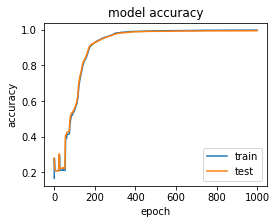

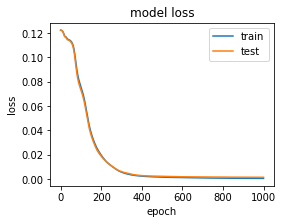

In [9]:
import matplotlib.pyplot as plt

# summarize history for accuracy
fig = plt.figure(figsize=(4,3))
plt.plot(MLP.history['acc'])
plt.plot(MLP.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
rootdir = 'F:/OneDrive/Research & Study/Thesis Writing/mlp_acc.png'
plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=11)
plt.show()

# summarize history for loss
fig = plt.figure(figsize=(4,3))
plt.plot(MLP.history['mean_squared_error'])
plt.plot(MLP.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
rootdir = 'F:/OneDrive/Research & Study/Thesis Writing/mlp_loss.png'
plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=11)
plt.show()
